In [182]:
import pickle
import numpy as np
np.random.seed(0)

outgirls24 = pickle.load(open('outgirls_24_big.pkl', 'rb'))
(model, xtrain, ytrain, xtest, ytest, ytestlabel, ytrainlabel, auc_test, r2test, feature_headers, centroids, hnew, standardDevCentroids, cnt_clusters, distances, muxnew, stdxnew, mrnstrain, mrnstest) = outgirls24
weights = model.coef_
sorted_ix = np.argsort(-1 * abs(weights))
print(weights.shape)
print(len(feature_headers))
for ix in sorted_ix[0:10]:
    print (feature_headers[ix], weights[ix])
non_zero_ix = (xtrain.sum(axis=0) + xtest.sum(axis=0) > 0)
xtrain = xtrain[:, non_zero_ix]
xtest = xtest[:, non_zero_ix]
feature_headers = list(np.array(feature_headers)[non_zero_ix])
print(xtrain.shape)

(6562,)
6562
Vital: BMI-avg19to24 0.205593106351
Vital: Wt-avg19to24 0.179179150202
Vital: BMI-avg13to16 0.137592647186
Vital: BMI-avg16to19 0.0442002337933
Vital: BMI-avg3to5 0.0272311463422
Vital: Wt-latest 0.0141353725992
Zipcode:07032 0.0
Zipcode:11238 -0.0
Zipcode:08501 0.0
Zipcode:11570 0.0
(630, 494)


In [2]:
xtrain.shape

(630, 494)

In [3]:
ytrain.shape

(630,)

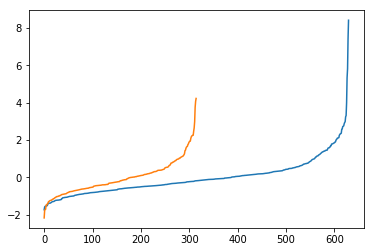

In [4]:
import matplotlib.pylab as plt
import numpy as np

plt.plot(np.sort(ytrain))
plt.plot(np.sort(ytest))
plt.show()

In [5]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms


In [6]:
def normalize(x, filter_percentile_more_than_percent=5, mu=[], std=[], bin_ix=[]):
    unobserved = (x == 0)*1.0
    if len(bin_ix) == 0:
        bin_ix = ( x.min(axis=0) == 0 ) & ( x.max(axis=0) == 1)
    xcop = x * 1.0
    xcop[xcop==0] = np.nan
    if len(mu) == 0:
        mu = np.nanmean(xcop, axis=0)
        mu[bin_ix] = 0.0
        mu[np.isnan(mu)] = 0.0
    if len(std) == 0:
        std = np.nanstd(xcop, axis=0)
        std[std==0]=1.0
        std[bin_ix]=1.0
        std[np.isnan(std)]=1.0

    normed_x = (x != 0) * ((x - mu)/ std*1.0)
    normed_x[abs(normed_x)>filter_percentile_more_than_percent] = 0
    return normed_x, mu, std, bin_ix, unobserved



In [8]:
xtrainNorm, mu, sg, bin_ix, unobserved = normalize(xtrain)
xtestNorm, mutest, sgtest, bin_ix_test, unobserved_test = normalize(xtest, mu=mu, std=sg, bin_ix=bin_ix)

cont_ix = (np.array(bin_ix) == False)
xtrain_bin = xtrain[:,bin_ix]

xtrainNorm_cont = xtrainNorm[:,cont_ix]
xtrainNorm_bin = xtrainNorm[:,bin_ix]
unobserved_bin = unobserved[:, bin_ix]
unobserved_cont = unobserved[:,cont_ix]

xtestNorm_cont = xtestNorm[:,cont_ix]
xtestNorm_bin = xtestNorm[:,bin_ix]
unobservedtest_bin = unobserved_test[:, bin_ix]
unobservedtest_cont = unobserved_test[:,cont_ix]

print(xtrainNorm.shape, xtestNorm.shape, xtestNorm_bin.shape, xtestNorm_cont.shape)

(630, 494) (315, 494) (315, 402) (315, 92)


/Users/Narges/anaconda2/envs/3point5/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/Narges/anaconda2/envs/3point5/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [10]:
import train


In [11]:
out = train.train_regression(xtrain, ytrain, ytrainlabel, False, 'lasso', feature_headers, mrnstrain)
weights = out[0].coef_
sorted_ix = np.argsort(-1 * abs(weights))
print(weights.shape)
print(len(feature_headers))
for ix in sorted_ix:
    print (feature_headers[ix], weights[ix])
    if weights[ix] == 0:
        break

CV R^2 for alpha: 0.001 is: -0.133171877358
CV R^2 for alpha: 0.005 is: 0.134860345203
CV R^2 for alpha: 0.01 is: 0.179531641521
CV R^2 for alpha: 0.1 is: 0.203349509928
best alpha via CV: 0.1
AUC train: 0.760 Explained Variance Score Train: 0.235
AUC test: 0.735 Explained Variance Score Test: 0.203
(494,)
494
Vital: Wt for Len Percentile-avg13to16 0.18273367194
Vital: BMI-avg10to13 0.163031797002
Vital: Wt for Len Percentile-avg16to19 0.0991073052831
Diagnosis:9ccs0:No DX -0.0


In [15]:
out = train.train_regression(xtrainNorm, ytrain, ytrainlabel, False, 'lasso', feature_headers, mrnstrain)
weights = out[0].coef_
sorted_ix = np.argsort(-1 * abs(weights))
print(weights.shape)
print(len(feature_headers))
for ix in sorted_ix:
    print (feature_headers[ix], weights[ix])
    if weights[ix] == 0:
        break

CV R^2 for alpha: 0.001 is: -0.112209465707
CV R^2 for alpha: 0.005 is: 0.130712450835
CV R^2 for alpha: 0.01 is: 0.180106260595
CV R^2 for alpha: 0.1 is: 0.204682954971
best alpha via CV: 0.1
AUC train: 0.760 Explained Variance Score Train: 0.235
AUC test: 0.736 Explained Variance Score Test: 0.205
(494,)
494
Vital: Wt for Len Percentile-avg13to16 0.178811885914
Vital: BMI-avg10to13 0.160617104815
Vital: Wt for Len Percentile-avg16to19 0.101987647441
Diagnosis:9ccs0:No DX -0.0


In [176]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms

class ClusterTimeseries(nn.Module):
    def __init__(self, kcnt, timedim, xdim):
        super(ClusterTimeseries, self).__init__()
        self.dtype = torch.FloatTensor
        self.kcnt = kcnt
        self.timedim = timedim
        self.xdim = xdim
        self.centroids = nn.ParameterList([nn.Parameter(torch.randn(self.xdim, self.timedim).type(self.dtype), requires_grad=True) for i in range(kcnt)])
    
    def forward(self, x):
        out = torch.sum((self.centroids[0] - x)**2)
        assignment = 0
        
        for i, k in enumerate(self.centroids):
            dist1 = torch.sum((k - x)**2)
            if dist1.data.numpy() < out.data.numpy():
                assignment = i
            out = torch.min(out, dist1)
            
        return out, assignment


(7,)
0.815875
0.471727
0.486888
0.467623
0.475837
0.485402
0.522472
0.478112
0.485146
0.505203
0.483469
0.478786
0.521857
0.468304
0.48499
0.495582
0.49552
0.481332
0.516939
0.477719
0.480691
0.50894
0.508956
0.467276
0.508829
0.467042
0.484988
0.523563
0.521587
0.502871
0.503191
0.488814
0.492315
0.523926
0.472113
0.516807
0.524252
0.484651
0.47375
0.477774
0.50653
0.518062
0.510158
0.470147
0.49679
0.493464
0.537515
0.461059
0.505406
0.494739
0.505163
0.478448
0.477986
0.507432
0.47645
0.486298
0.50236
0.504261
0.501163
0.505523
0.480076
0.501314
0.509749
0.464671
0.465798
0.481353
0.481766
0.53385
0.533707
0.478574
0.490481
0.505178
0.504563
0.512714
0.480132
0.460672
0.534259
0.502355
0.471713
0.486395
0.494655
0.491913
0.468531
0.495597
0.516802
0.503975
0.496541
0.527073
0.471208
0.538794
0.466172
0.503032
0.532085
0.528552
0.469623
0.486134
0.521997
0.520081
0.48404
0.4885


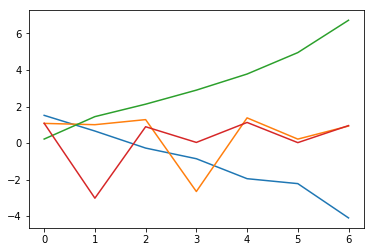

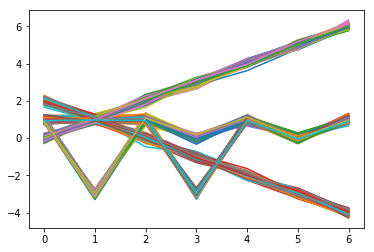

In [195]:
x = np.array([[0,1,2,3,4,5,6], [2,1,0,-1,-2,-3,-4], [1,-3,1,0,1,0,1], [1,1,1,-3,1,0,1]])
learning_rate = 0.5
model = ClusterTimeseries(x.shape[0], x.shape[1], 1)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
print(x[ix%x.shape[0]].shape)
x = np.array([ x[ix%x.shape[0]]+np.random.randn(x[ix%x.shape[0]].shape[0])*0.1 for ix in range(0, 1000)])
xvar = Variable(torch.from_numpy(x)).float()
assignment = np.zeros((len(x)), dtype=int)
model.train()
for t in range(100):
    avg_out = []
    randix = np.arange(0, len(xvar))
    np.random.shuffle(randix)
    for i in range(len(xvar)):
        optimizer.zero_grad()
        out, assignment[randix[i]] = model(xvar[randix[i]].resize(1,x.shape[1]))
        avg_out.append(out.data.numpy())
        out.backward()
        optimizer.step()
    print(np.array(avg_out).mean())  
[plt.plot(model.centroids[i].data.numpy().ravel()) for i in range(0,len(model.centroids))]; plt.show()
[plt.plot(xvar[i,:].data.numpy().ravel()) for i in range(0,len(x))]; plt.show()


